# Gestión Moderna de portafolio
### Autores Bernardo León y Carlos Zapata
### Copyright 2022

## Capitulo 8: Modelos Factoriales


In [ ]:
#Librerías usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


### Ejemplo 8.1

### Estimación modelo CAPM

In [ ]:
# Información histórica para la acción de WMT
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
precios_wmt = yf.download("WMT",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
retornos_wmt = np.log(precios_wmt/precios_wmt.shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Información histórica del índice SP 500
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
precios_sp = yf.download("^GSPC",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
retornos_sp = np.log(precios_sp/precios_sp.shift(1)).dropna()
rm = retornos_sp.mean()

[*********************100%***********************]  1 of 1 completed


In [ ]:
## Estimación modelo de mercado: CAPM
import statsmodels.api as sm
X = sm.add_constant(retornos_sp) #
modelo1 = sm.OLS(retornos_wmt, X).fit()

beta_wmt = modelo1.params[1]
beta_wmt

print("Beta: ", beta_wmt)
print("R2: ", modelo1.rsquared)

Beta:  0.41443305868939256
R2:  0.13168630891696287


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     8.796
Date:                Mon, 29 Aug 2022   Prob (F-statistic):            0.00438
Time:                        16:10:40   Log-Likelihood:                 98.854
No. Observations:                  60   AIC:                            -193.7
Df Residuals:                      58   BIC:                            -189.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.006      1.916      0.060      -0.001       0.025
Adj Close      0.4144      0.140      2.966      0.004       0.135       0.694
==============================================================================
Omnibus:                        6.029   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                6.847
Skew:                          -0.359   Prob(JB):                       0.0326
Kurtosis:                       4.491   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predictions = modelo1.predict(X)

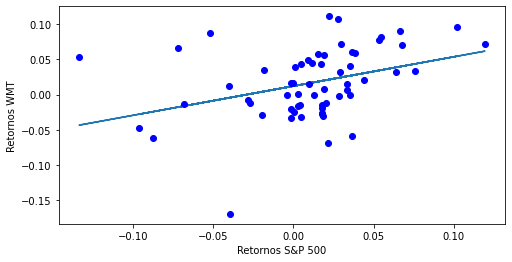

In [ ]:
# Grafico de regresión: WMT - S&P 500
plt.figure(figsize=(8, 4))
plt.plot(retornos_sp, predictions)  # regression line
plt.plot(retornos_sp, retornos_wmt, 'bo') 
plt.xlabel('Retornos S&P 500')
plt.ylabel('Retornos WMT')
plt.show()

### Estimación modelo Factorial

In [ ]:
tasa_txn = yf.download('TXN',start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
retornos_txn = np.log(tasa_txn/tasa_txn.shift(1)).dropna()
mu_txn = retornos_txn.mean()

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Regresión factorial con S&P 500 y TXN
Xf = np.column_stack((retornos_sp,retornos_txn))
Xf = sm.add_constant(Xf) 
modelo2 = sm.OLS(retornos_wmt, Xf).fit()
modelo2.params

beta_wmt = modelo2.params[1]
beta_txn = modelo2.params[2]

print("Beta: ", beta_wmt)
print("Beta TXN: ", beta_txn)
print("R2: ", modelo2.rsquared)

Beta:  0.4820447701006357
Beta TXN:  -0.06387466829352824
R2:  0.13436577961814267


In [ ]:
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     4.424
Date:                Mon, 29 Aug 2022   Prob (F-statistic):             0.0164
Time:                        16:35:34   Log-Likelihood:                 98.947
No. Observations:                  60   AIC:                            -191.9
Df Residuals:                      57   BIC:                            -185.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0127      0.006      1.948      0.0

In [ ]:
# Retornos estimados 
# CAPM
re_capm = round(beta_wmt*rm,4)

# Factorial
re_fact = round(beta_wmt*rm+beta_txn*mu_txn,4)

print("E(R) capm: ", re_capm)
print("E(R) fact: ", re_fact)

E(R) capm:  0.0049
E(R) fact:  0.0036


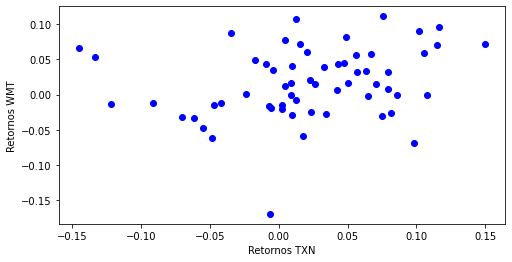

In [ ]:
# Grafico de regresión: WMT - TXN
plt.figure(figsize=(8, 4))
#plt.plot(retornos_sp, predictions)  # regression line
plt.plot(retornos_txn, retornos_wmt, 'bo') 
plt.xlabel('Retornos TXN')
plt.ylabel('Retornos WMT')
plt.show()

### Ejemplo 8.2: Estimación factorial

In [ ]:
# Información histórica para las acciones: AAPL, AMZN, GOOG y MSFT
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
activos = ["AAPL","AMZN","GOOGL","MSFT"]
precios = yf.download(activos,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()

[*********************100%***********************]  4 of 4 completed


In [ ]:
# Load data INDIPRO y UNEMP
factores = pd.read_csv("factores.csv")[['indipro','unemp']]
factores.index = retornos_sp.index
factores2 = factores.join(retornos_sp)

In [ ]:
# Regresión factorial para AAPL
modeloAAPL = sm.OLS(retornos['AAPL'], sm.add_constant(factores2)).fit()
modeloAAPL.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const       -0.002297
indipro      0.353466
unemp        0.365616
Adj Close    1.212094
dtype: float64

In [ ]:
# Regresión factorial para AMZN
modeloAMZN = sm.OLS(retornos['AMZN'], sm.add_constant(factores2)).fit()
modeloAMZN.params

const        0.005526
indipro     -0.318332
unemp        0.190845
Adj Close    1.106079
dtype: float64

In [ ]:
# Regresión factorial para GOOG
modeloGOOG = sm.OLS(retornos['GOOGL'], sm.add_constant(factores2)).fit()
modeloGOOG.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const        0.004411
indipro     -0.181095
unemp       -0.016870
Adj Close    0.984519
dtype: float64

In [ ]:
# Regresión factorial para MSFT
modeloMSFT = sm.OLS(retornos['MSFT'], sm.add_constant(factores2)).fit()
modeloMSFT.params

const        0.024674
indipro     -0.081283
unemp       -0.168634
Adj Close    0.828126
dtype: float64

### Ejemplo 8.3: Modelos Factoriales - Fama y French

In [ ]:
# Información histórica para la acción de WMT
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
activos = ["AAPL","AMZN","GOOGL","MSFT"]
precios = yf.download(activos,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()

In [ ]:
# Factores del modelo de estimacion
# Importar la info descargada desde la web-page de Keneth French
datosff3 = pd.read_csv("datosff3.csv")[['Mkt-RF','SMB','HML']]
datosff3.index = retornos.index

In [ ]:
# Regresión unifactorial para AAPL
modeloAAPL = sm.OLS(retornos['AAPL'], sm.add_constant(datosff3['Mkt-RF'])).fit()
modeloAAPL.params

In [ ]:
modeloAAPLf = sm.OLS(retornos['AAPL'], sm.add_constant(datosff3)).fit()
modeloAAPLf.params